#1. Data Extraction

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize

In [ ]:
# Load your dataset
data = pd.read_csv('/content/data.csv')

#2. Data Validation, Cleansing, Aggregation and Representation

In [ ]:
print(data.describe())

       Marital status  Application mode  Application order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571         18.669078           1.727848  8856.642631   
std          0.605747         17.484682           1.313793  2063.566416   
min          1.000000          1.000000           0.000000    33.000000   
25%          1.000000          1.000000           1.000000  9085.000000   
50%          1.000000         17.000000           1.000000  9238.000000   
75%          1.000000         39.000000           2.000000  9556.000000   
max          6.000000         57.000000           9.000000  9991.000000   

       Daytime/evening attendance\t  Previous qualification  \
count                   4424.000000             4424.000000   
mean                       0.890823                4.577758   
std                        0.311897               10.216592   
min                        0.000000                1.000000   
25%      

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


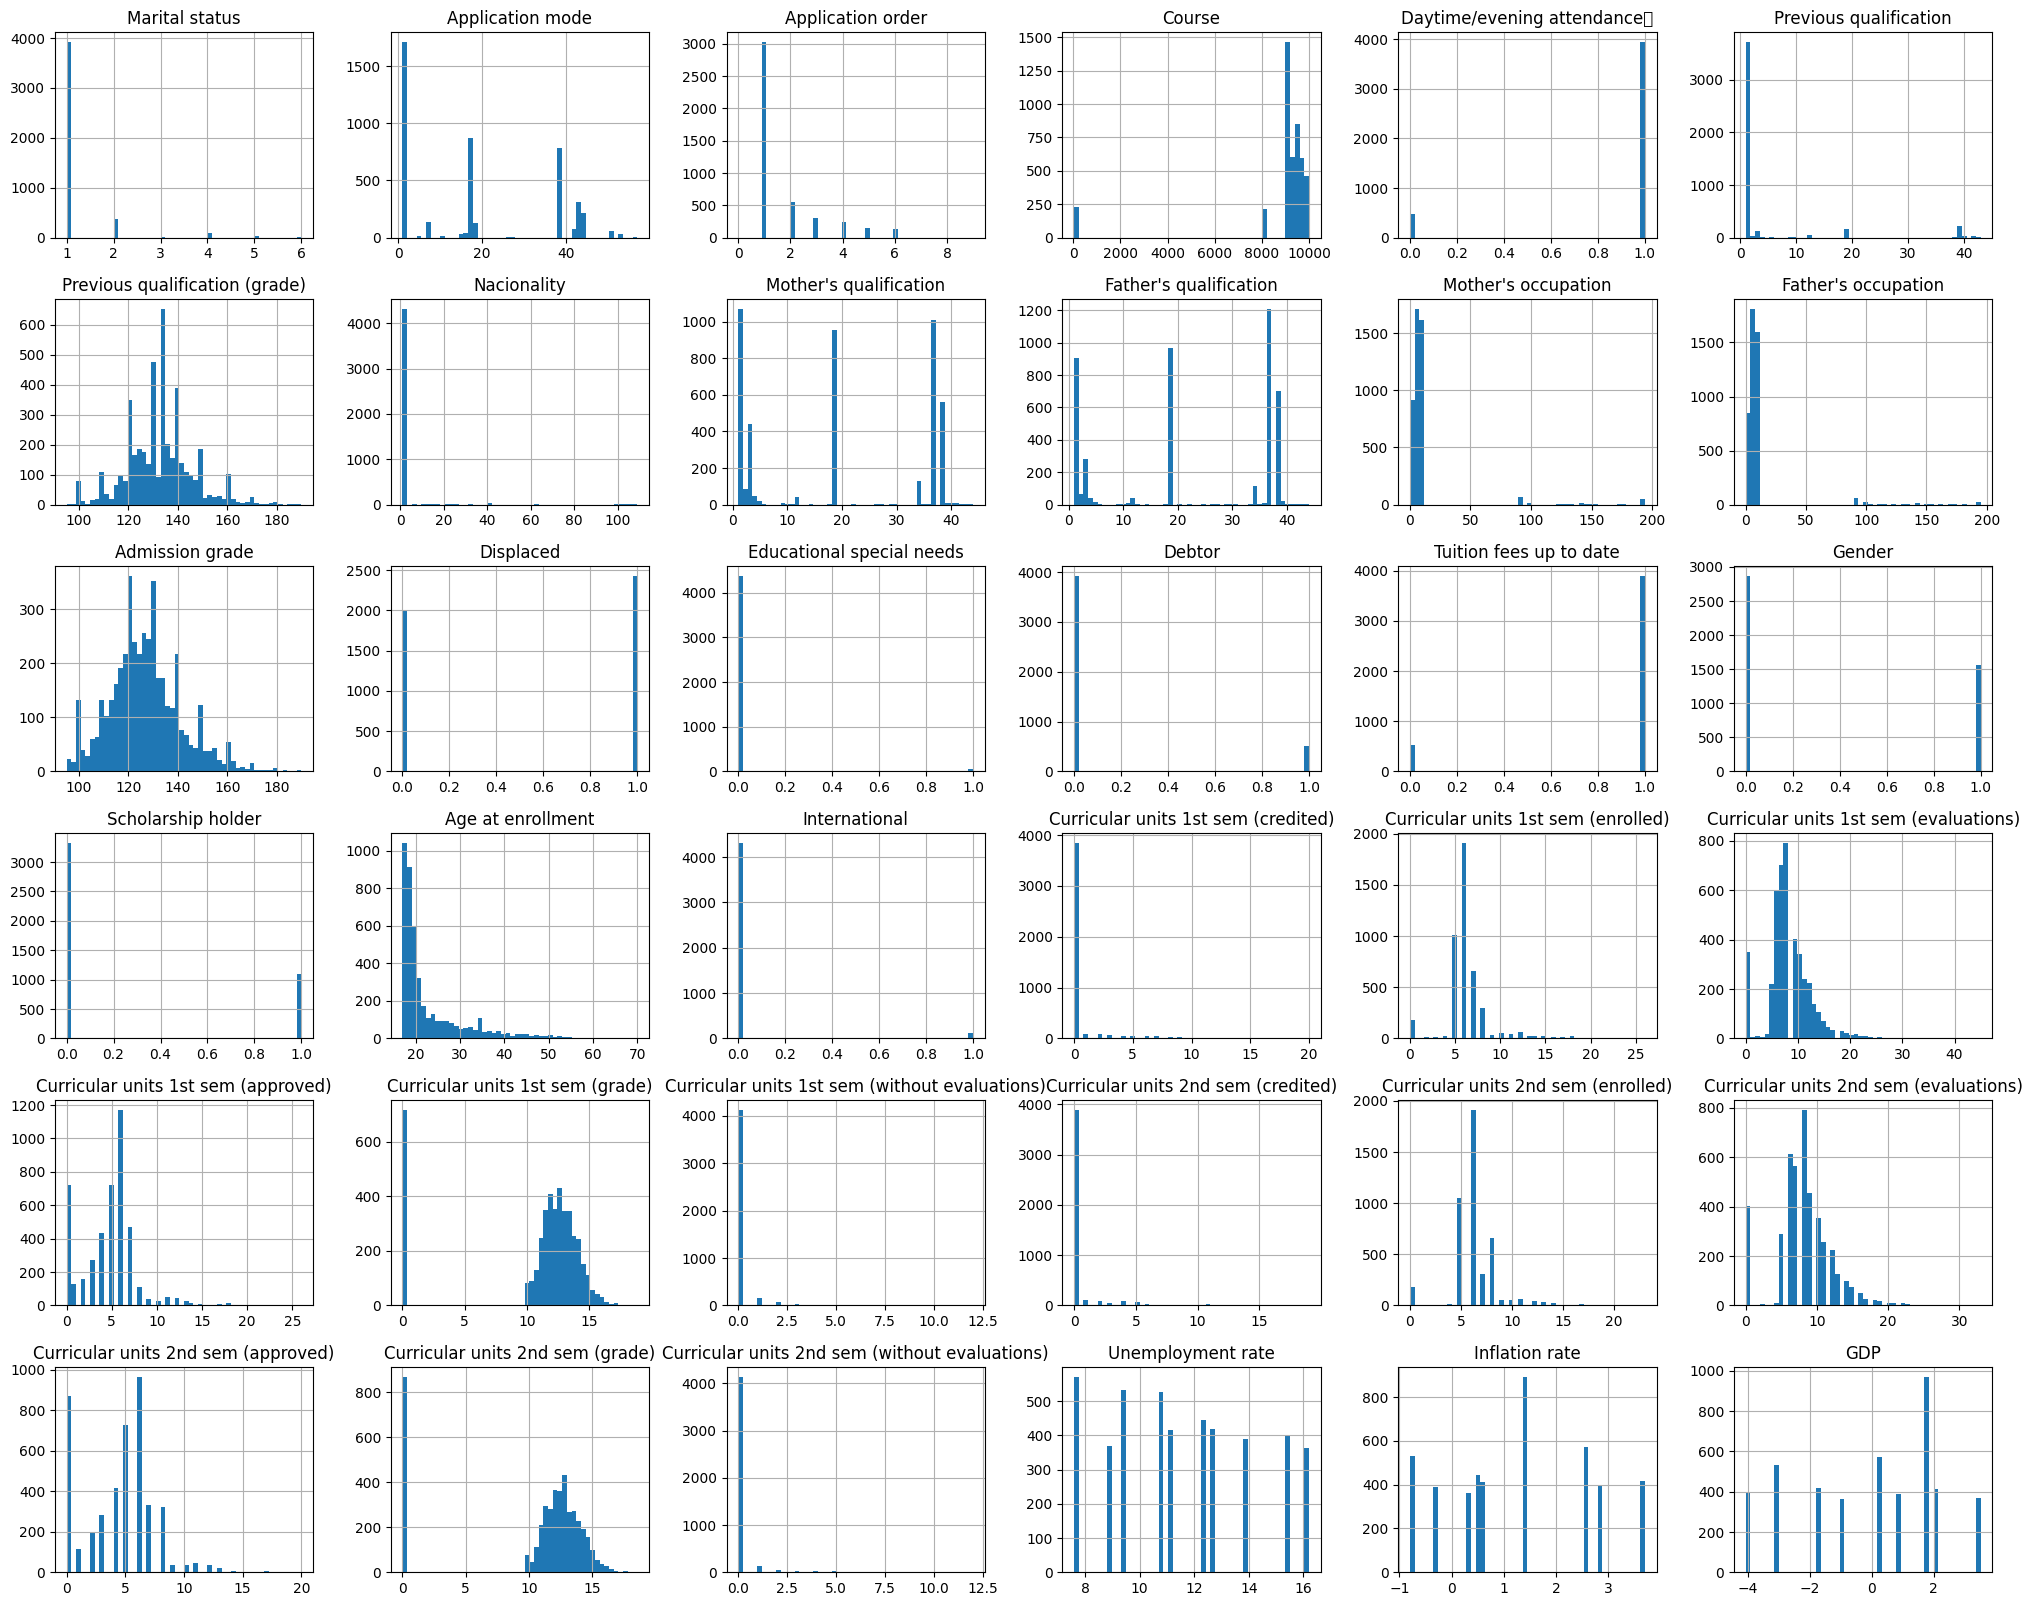

In [ ]:
data.hist(bins=50, figsize=(25,20))
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()


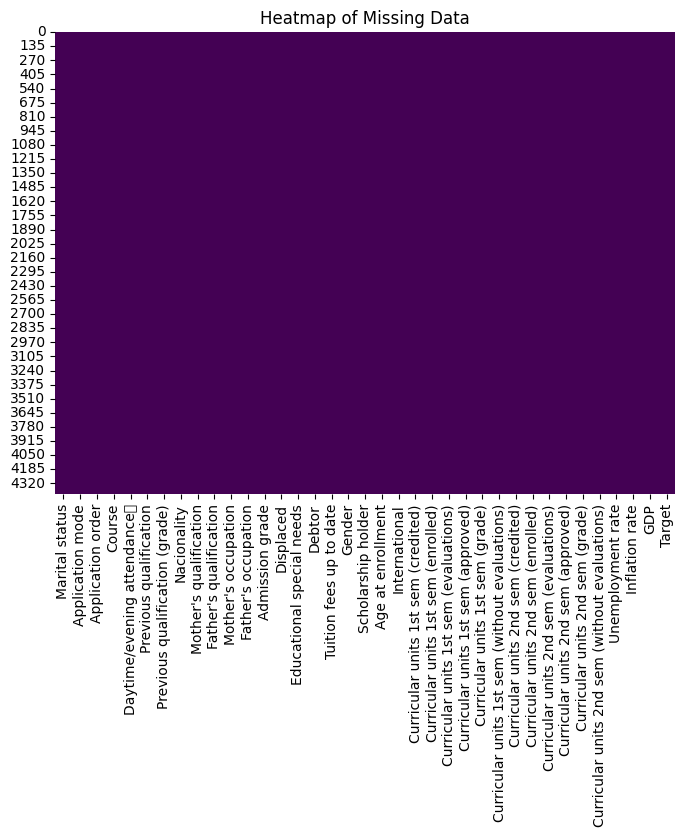

In [ ]:
missing_data_mask = data.isnull()

# Create the heatmap using seaborn
plt.figure(figsize=(8, 6))  # Optional: Adjust the figure size
sns.heatmap(missing_data_mask, cmap='viridis', cbar=False)
plt.title('Heatmap of Missing Data')
plt.show()

In [ ]:
data = data.drop_duplicates()
missing_values_count = data.isnull().sum()
print(missing_values_count)
data = data.dropna()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

<ipython-input-7-29c55889ecf6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


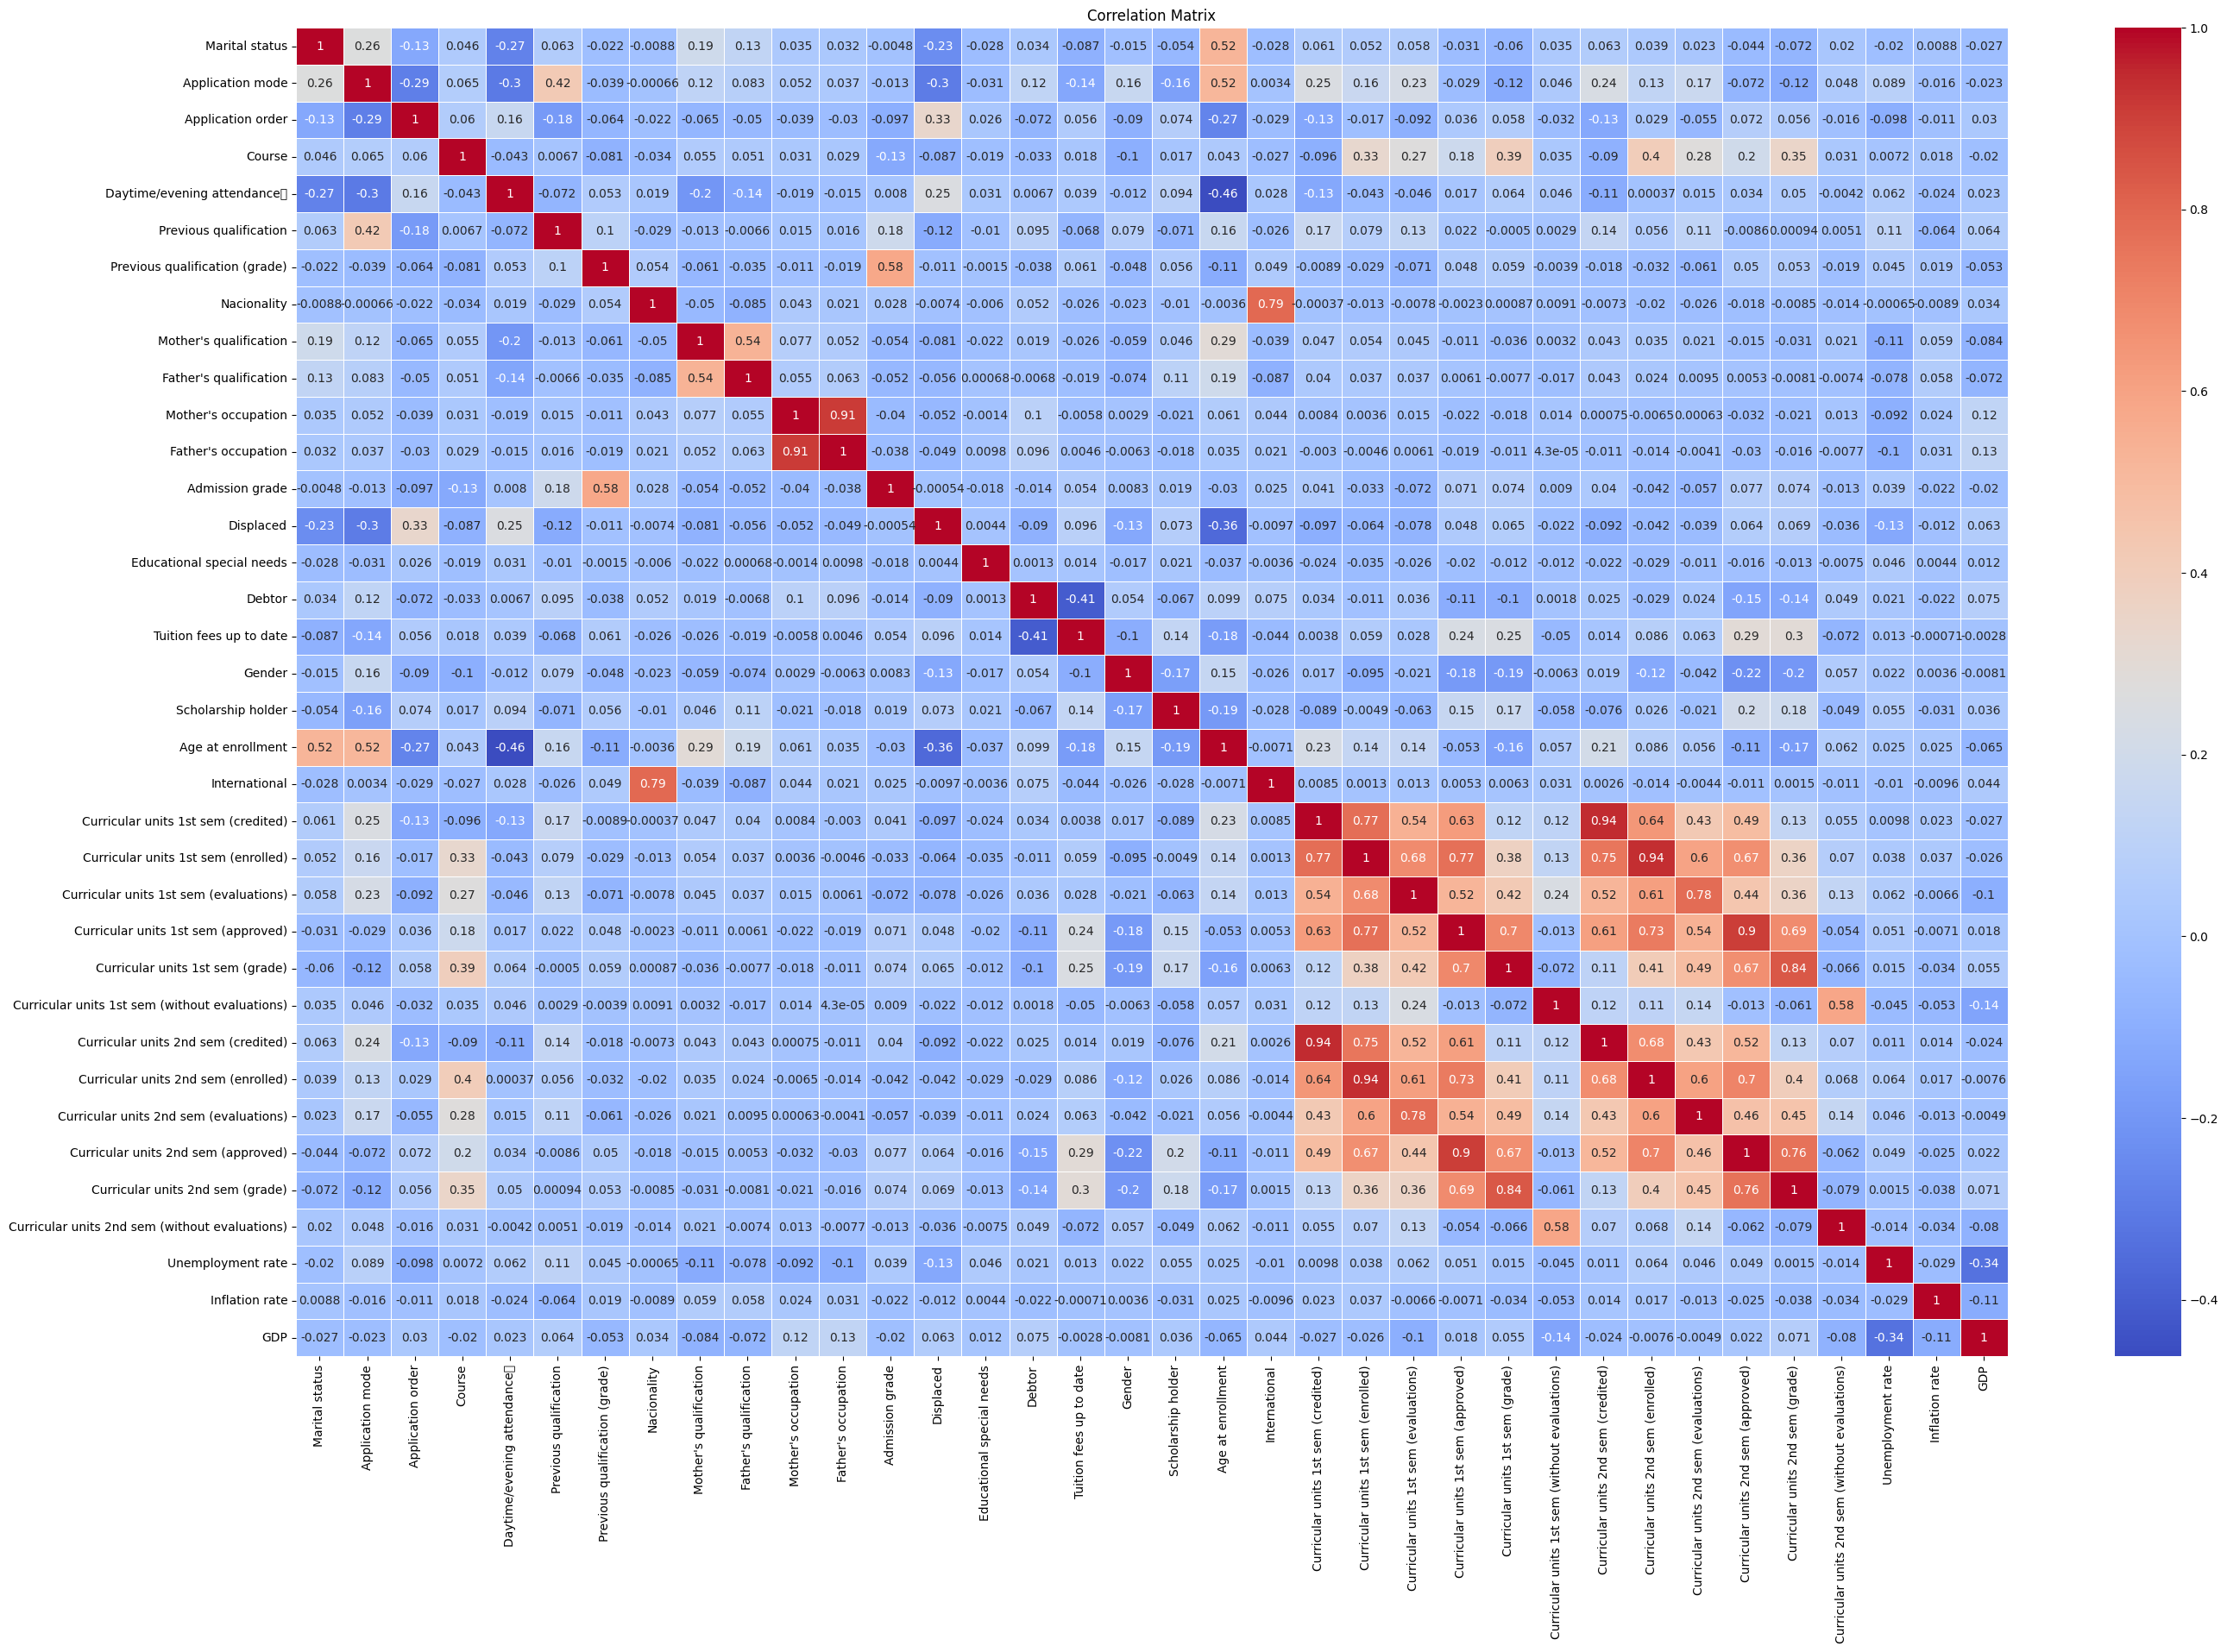

In [ ]:
correlation_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(32, 20))

# Plot the heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)

plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Create dictionary to map target values to numerical values
target_mapping = {'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}
data['Target'] = data['Target'].map(target_mapping)

In [ ]:
y = data[['Target']]
# Assuming the features are all other columns
X = data.drop(['Target'], axis=1)

<Figure size 1000x600 with 0 Axes>

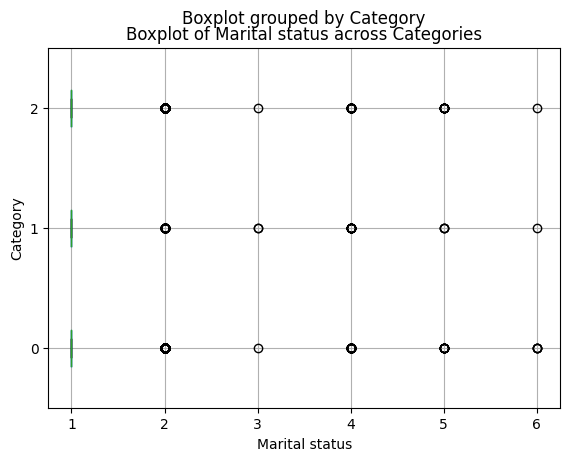

<Figure size 1000x600 with 0 Axes>

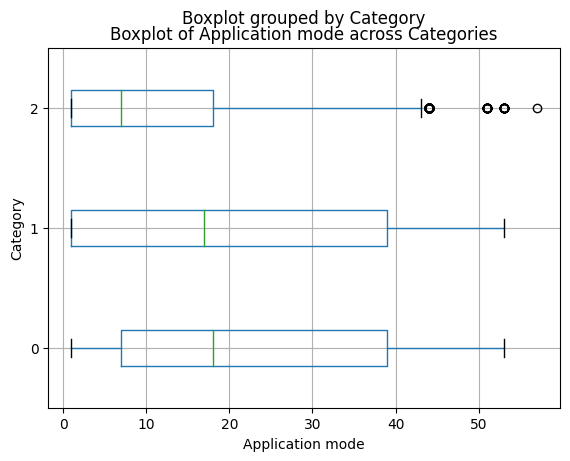

<Figure size 1000x600 with 0 Axes>

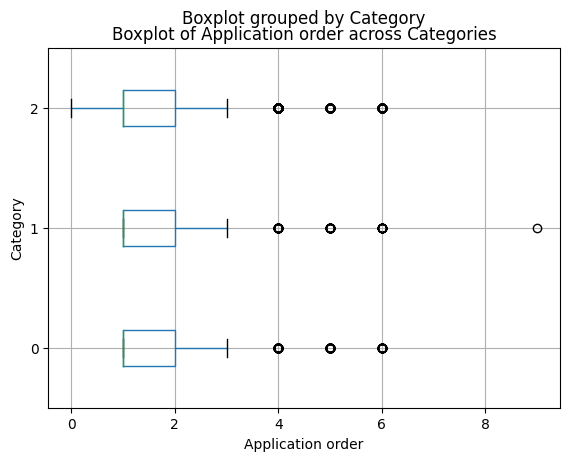

<Figure size 1000x600 with 0 Axes>

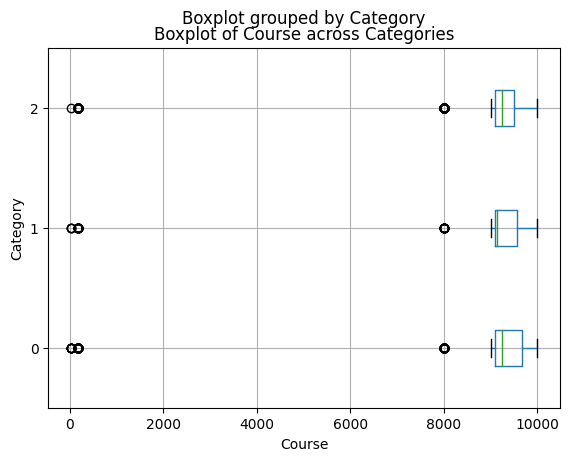

<Figure size 1000x600 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


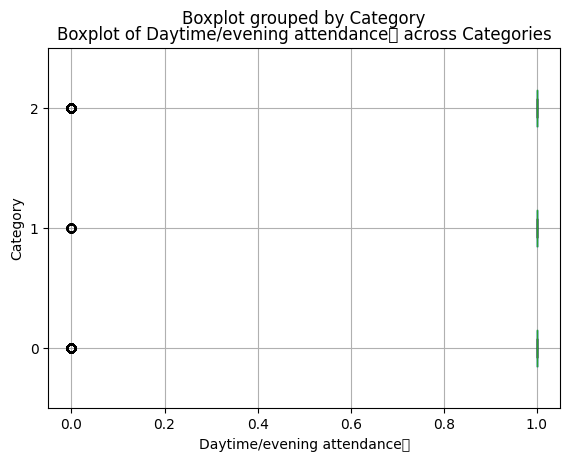

<Figure size 1000x600 with 0 Axes>

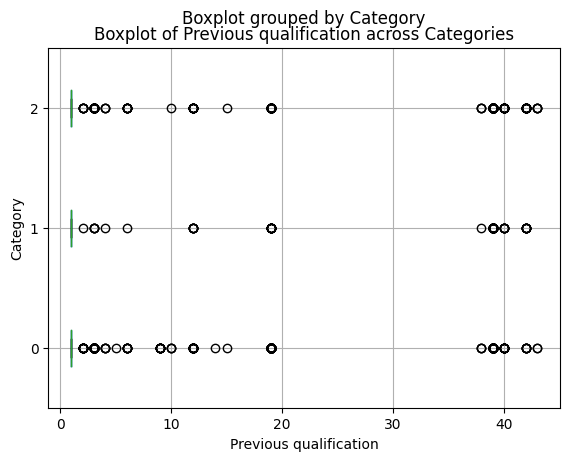

<Figure size 1000x600 with 0 Axes>

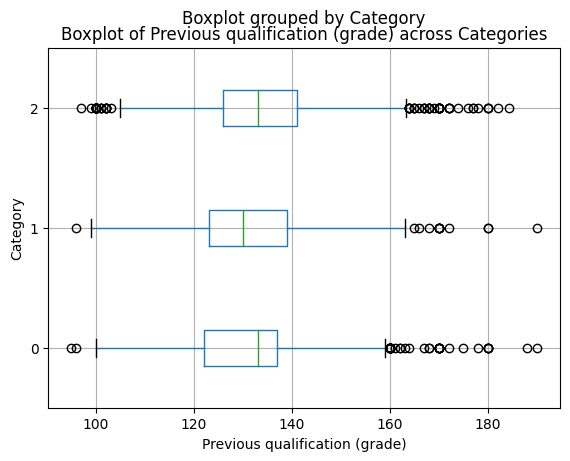

<Figure size 1000x600 with 0 Axes>

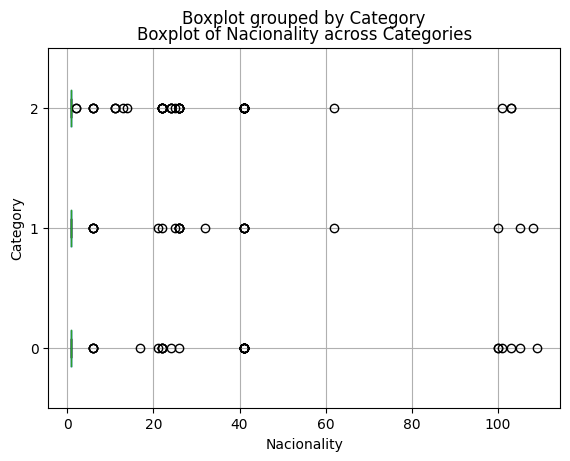

<Figure size 1000x600 with 0 Axes>

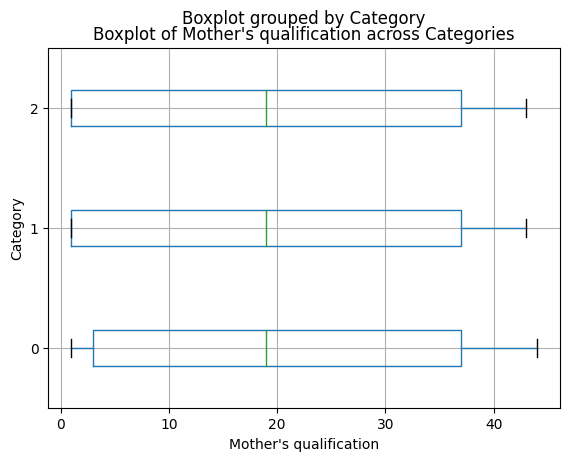

<Figure size 1000x600 with 0 Axes>

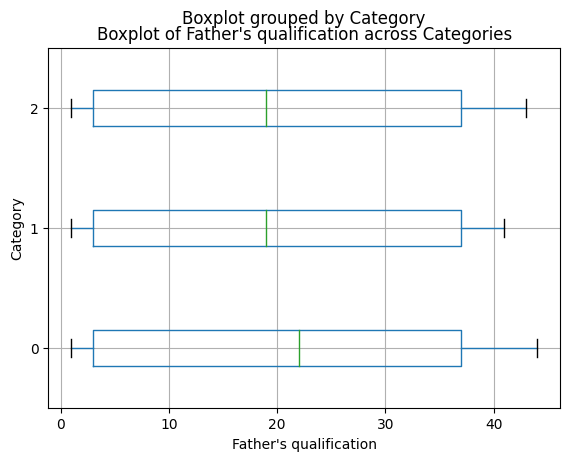

<Figure size 1000x600 with 0 Axes>

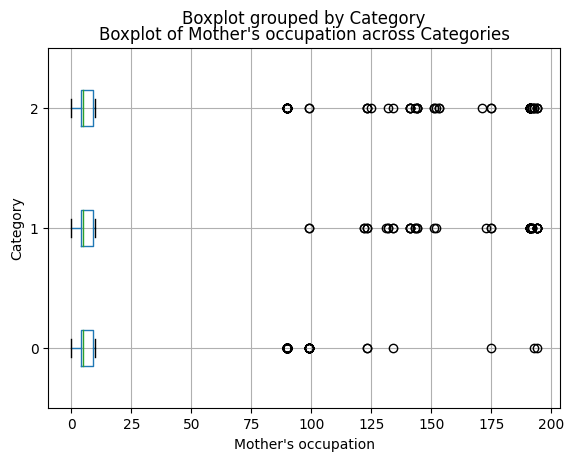

<Figure size 1000x600 with 0 Axes>

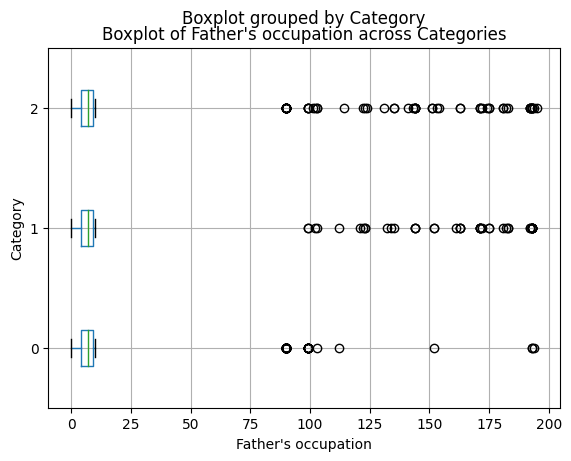

<Figure size 1000x600 with 0 Axes>

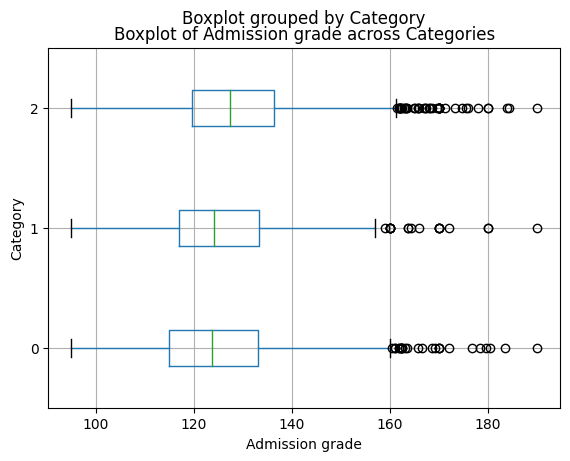

<Figure size 1000x600 with 0 Axes>

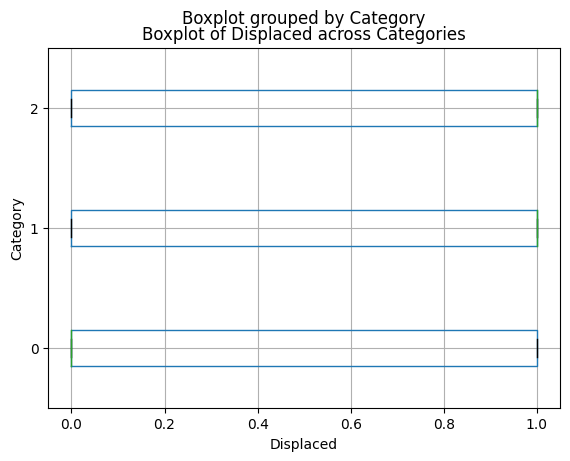

<Figure size 1000x600 with 0 Axes>

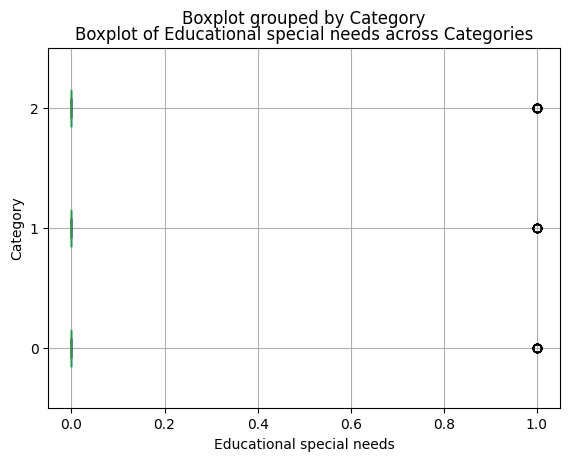

<Figure size 1000x600 with 0 Axes>

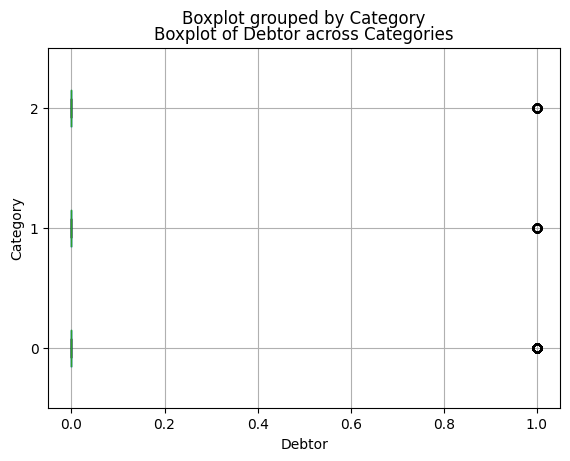

<Figure size 1000x600 with 0 Axes>

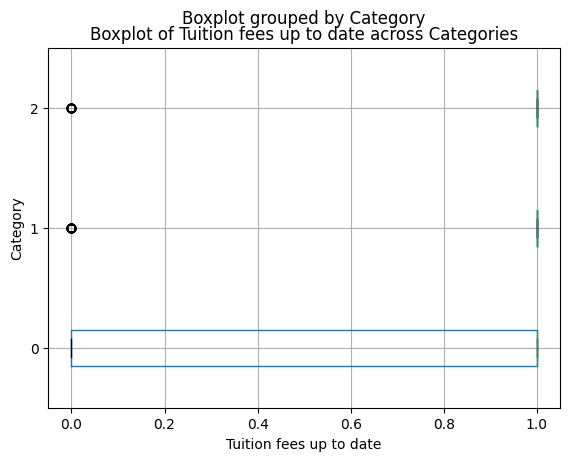

<Figure size 1000x600 with 0 Axes>

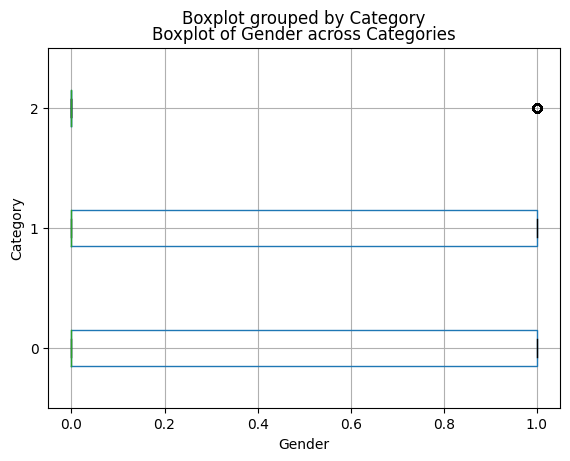

<Figure size 1000x600 with 0 Axes>

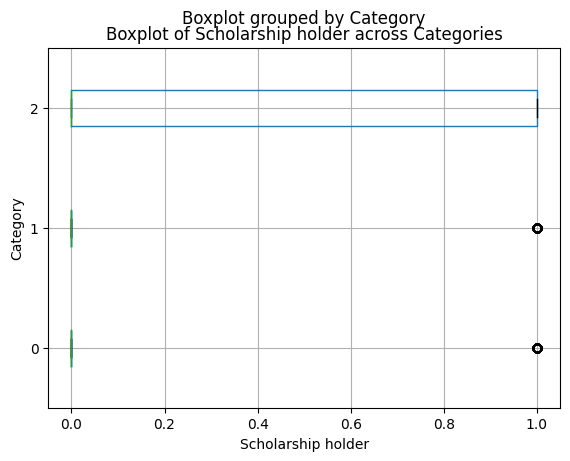

<Figure size 1000x600 with 0 Axes>

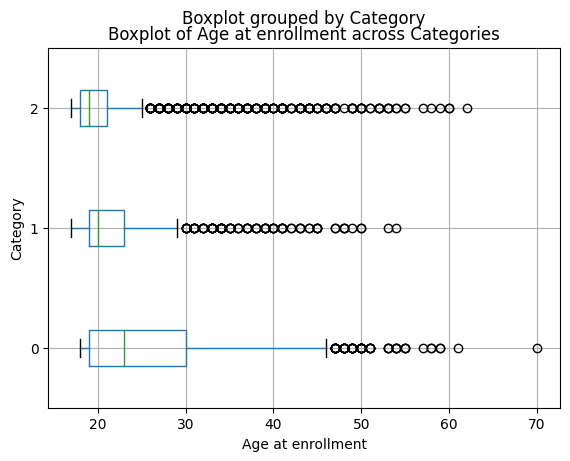

<Figure size 1000x600 with 0 Axes>

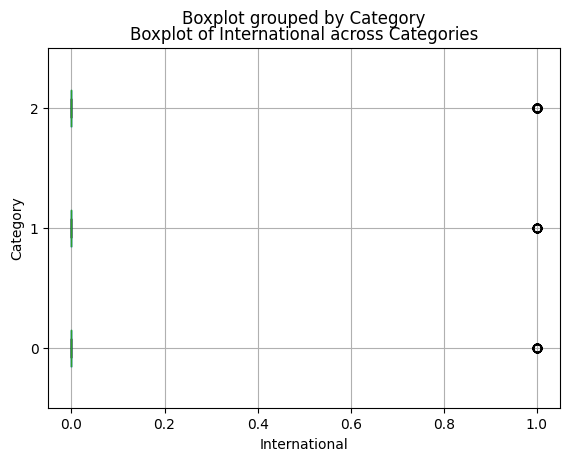

<Figure size 1000x600 with 0 Axes>

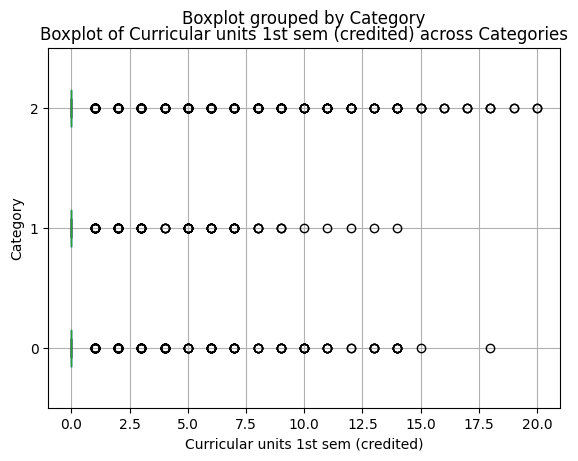

<Figure size 1000x600 with 0 Axes>

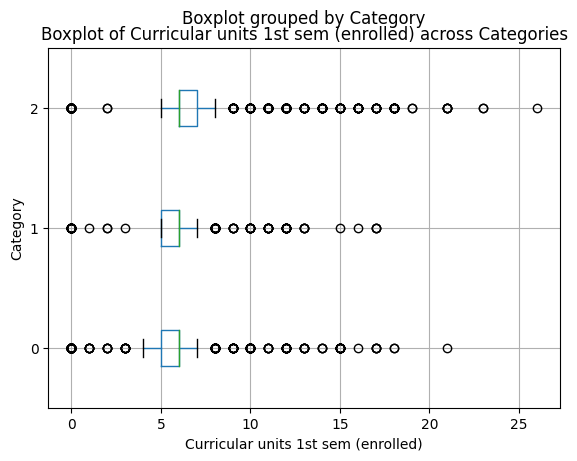

<Figure size 1000x600 with 0 Axes>

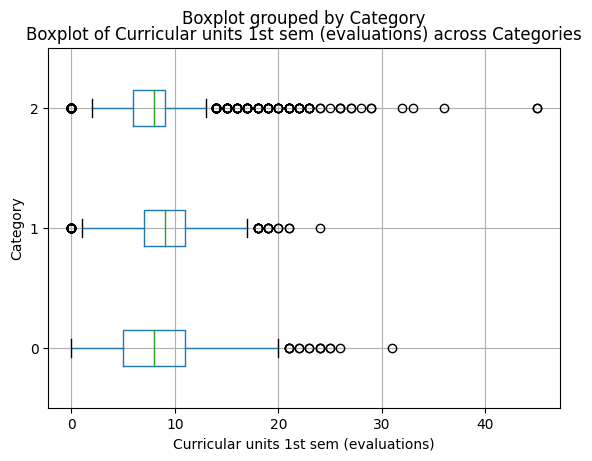

<Figure size 1000x600 with 0 Axes>

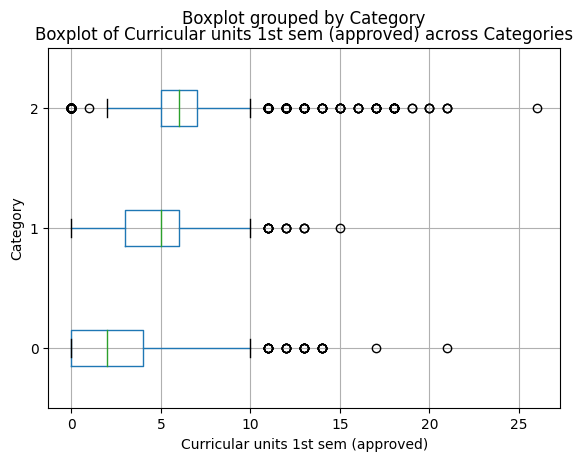

<Figure size 1000x600 with 0 Axes>

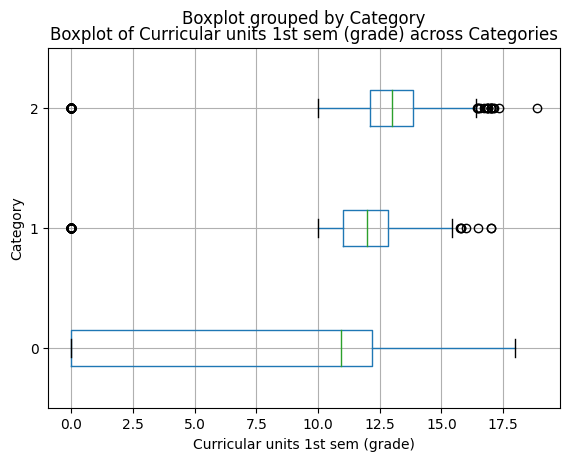

<Figure size 1000x600 with 0 Axes>

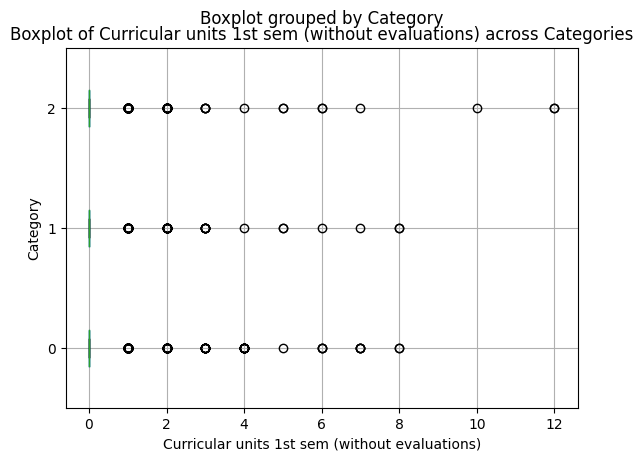

<Figure size 1000x600 with 0 Axes>

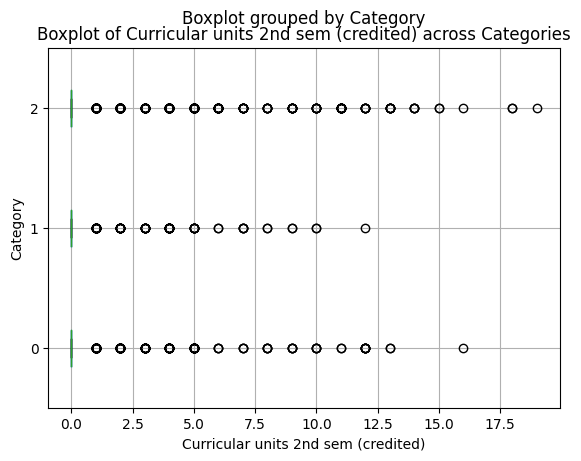

<Figure size 1000x600 with 0 Axes>

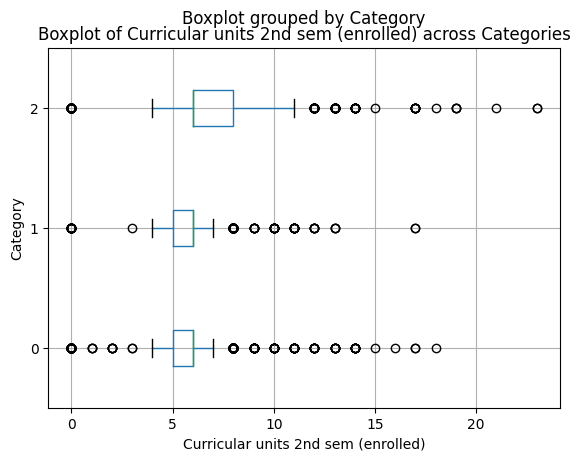

<Figure size 1000x600 with 0 Axes>

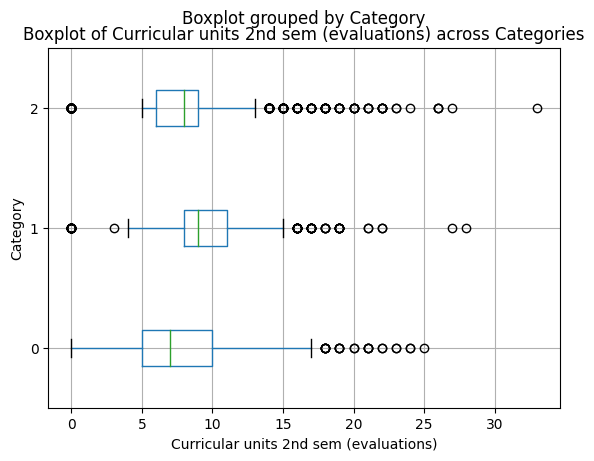

<Figure size 1000x600 with 0 Axes>

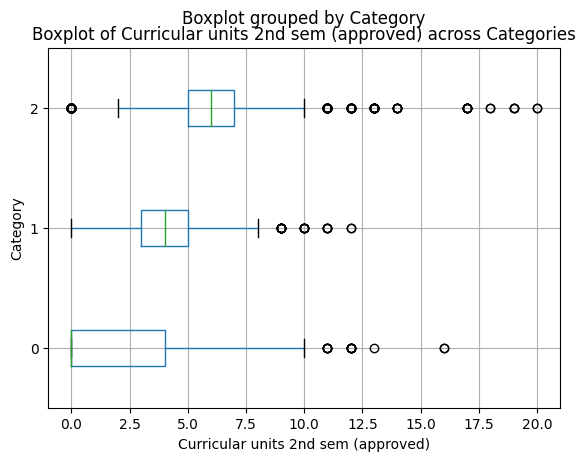

<Figure size 1000x600 with 0 Axes>

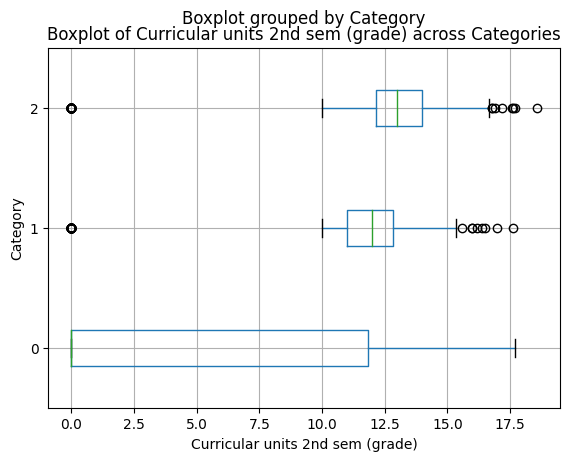

<Figure size 1000x600 with 0 Axes>

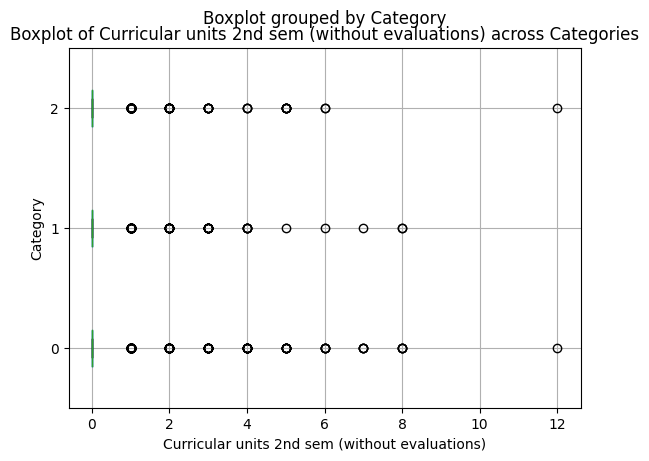

<Figure size 1000x600 with 0 Axes>

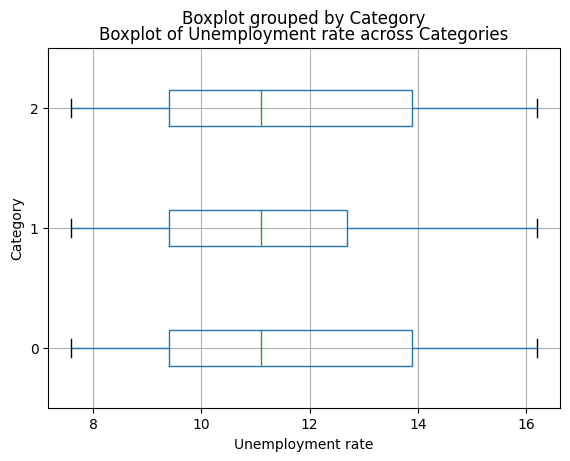

<Figure size 1000x600 with 0 Axes>

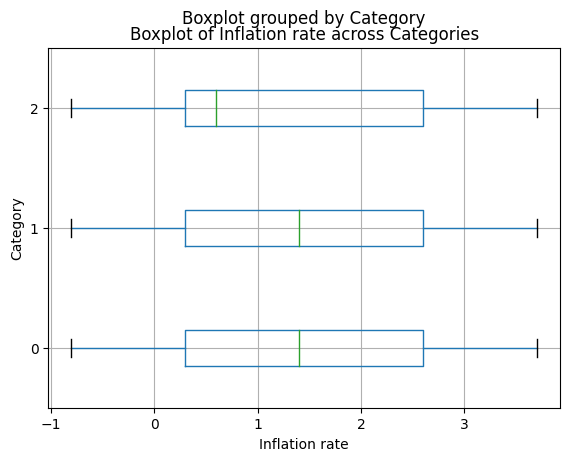

<Figure size 1000x600 with 0 Axes>

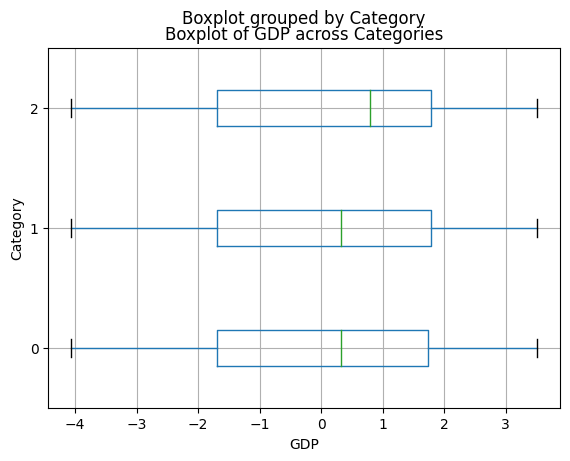

In [ ]:
# Create box plots for each feature across different categories
for feature in X.columns:
    plt.figure(figsize=(10, 6))
    data_box = pd.concat([X[feature], y], axis=1)
    data_box.columns = [feature, 'Category']
    data_box.boxplot(by='Category', vert=False)
    plt.title(f'Boxplot of {feature} across Categories')
    plt.xlabel(feature)
    plt.ylabel('Category')
    plt.show()

In [ ]:
# Winsorize features to handle outliers
X_winsorized = X.apply(lambda x: winsorize(x, limits=[0.05, 0.05]), axis=0)

In [ ]:
print(y.isnull().sum())
print(X.isnull().sum())

Target    0
dtype: int64
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                     

#3. Data Analysis

In [ ]:
# Split the labeled data into 70% and unlabeled data into 30% initially
X_labeled, X_unlabeled, y_labeled, y_unlabeled= train_test_split(X, y, test_size=0.3, random_state=42)

# Split the labeled data into training and validation sets
X_labeled_train, X_labeled_val, y_labeled_train, y_labeled_val = train_test_split(X_labeled, y_labeled, test_size=0.2, random_state=42)

# Split the unlabeled data into validation and test sets
X_unlabeled_val, X_unlabeled_test,y_unlabeled_val, y_unlabeled_test= train_test_split(X_unlabeled, y_unlabeled, test_size=0.5, random_state=42)



In [ ]:
# Initialize all models
models = [
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('Extra Trees', ExtraTreesClassifier(n_estimators=100, random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(n_estimators=200, random_state=42)),
    ('AdaBoost', AdaBoostClassifier(base_estimator=ExtraTreesClassifier(n_estimators=100, random_state=42),
                                    n_estimators=100, random_state=42)),
    ('Logistic Regression', LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)),
    ('SVM', SVC(probability=True)),
    ('Naive Bayes', GaussianNB()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42))
]

Random Forest Validation Accuracy: 0.7725806451612903


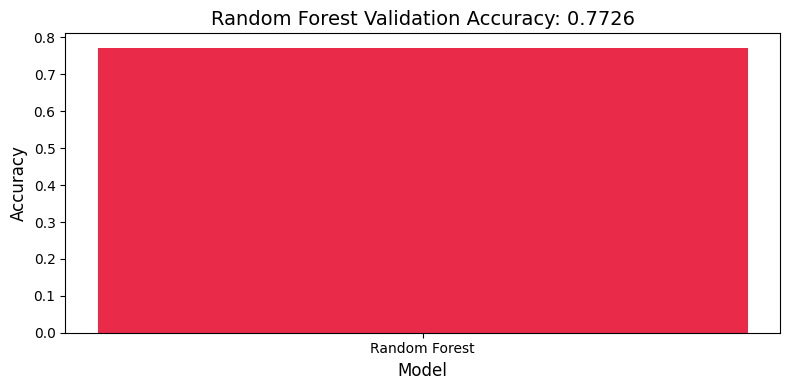

Extra Trees Validation Accuracy: 0.7758064516129032


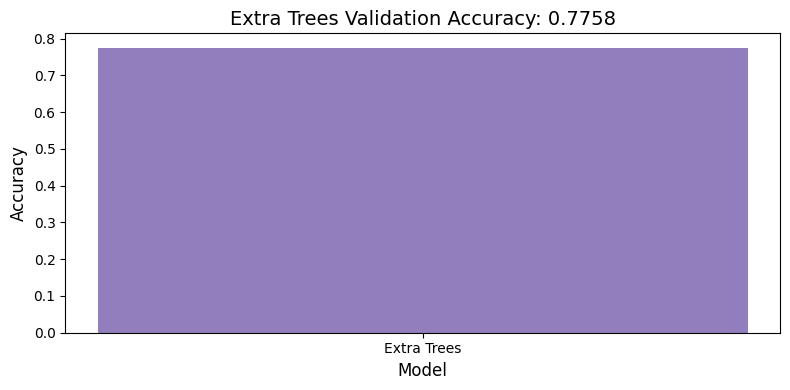

Gradient Boosting Validation Accuracy: 0.7935483870967742


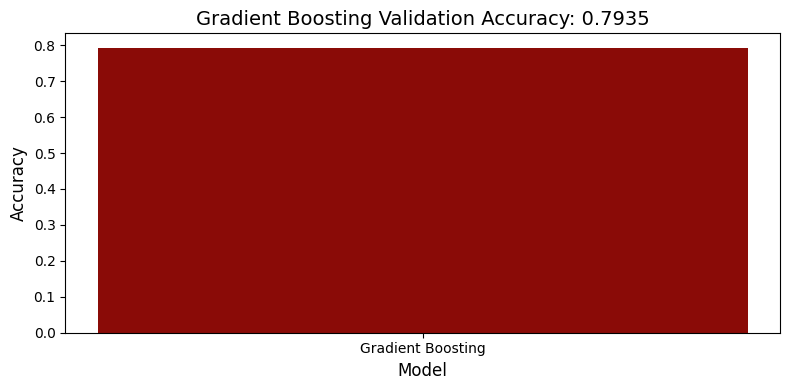

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoost Validation Accuracy: 0.7693548387096775


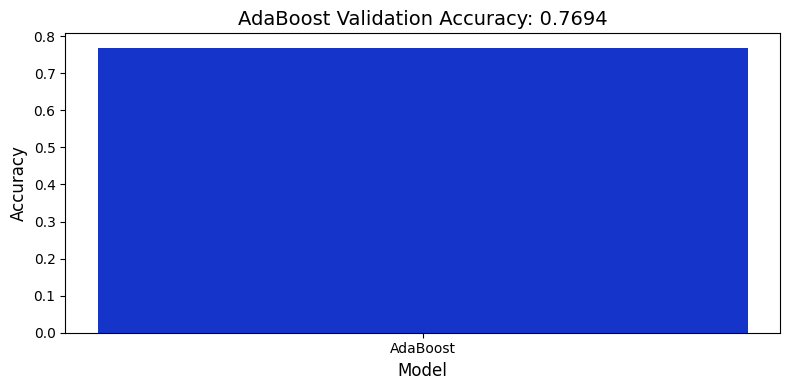

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Validation Accuracy: 0.7387096774193549


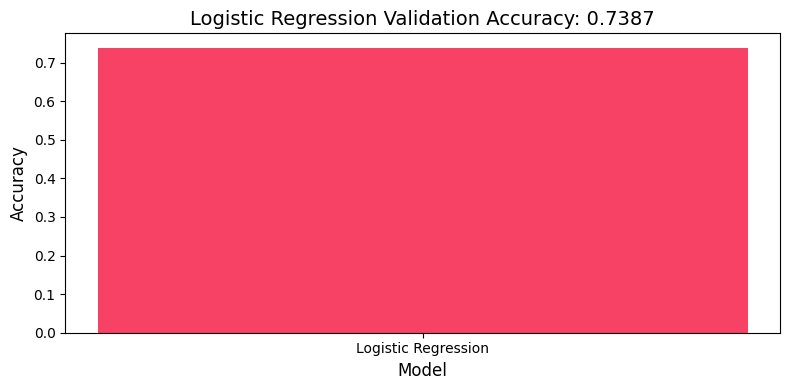

SVM Validation Accuracy: 0.49838709677419357


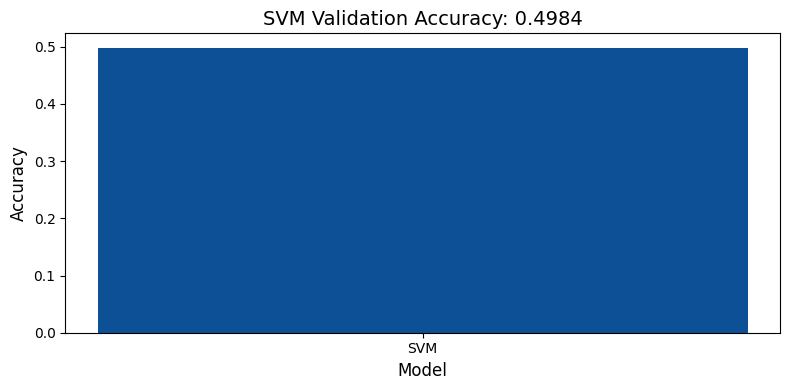

Naive Bayes Validation Accuracy: 0.7048387096774194


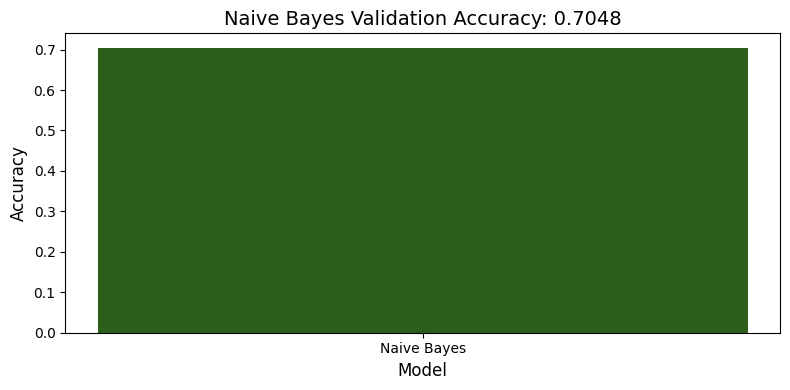

Decision Tree Validation Accuracy: 0.6758064516129032


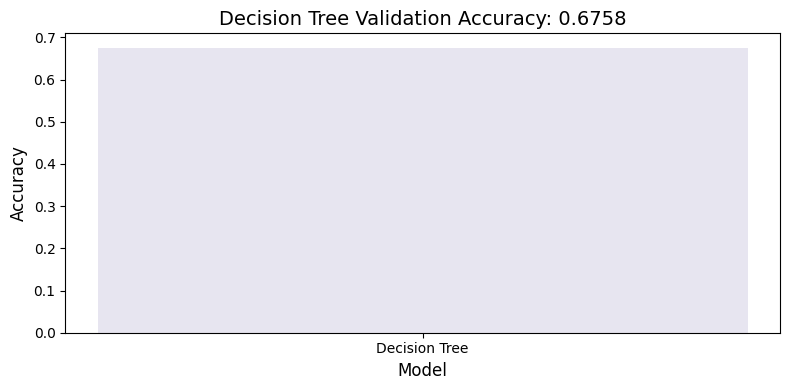

In [ ]:
# Lists to store model names and accuracies for visualization
model_names = []
accuracies = []

for name, model in models:
    model.fit(X_labeled_train, y_labeled_train.values.ravel())
    y_pred = model.predict(X_labeled_val)
    accuracy = accuracy_score(y_labeled_val, y_pred)
    print(f"{name} Validation Accuracy: {accuracy}")

    # Append model name and accuracy for visualization
    model_names.append(name)
    accuracies.append(accuracy)
    # Create a colorful bar plot for each model's validation accuracy
    plt.figure(figsize=(8, 4))
    plt.bar([name], [accuracy], color=np.random.rand(3,))
    plt.title(f"{name} Validation Accuracy: {accuracy:.4f}", fontsize=14)
    plt.xlabel("Model", fontsize=12)
    plt.ylabel("Accuracy", fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.show()

In [ ]:
# Select the top 5 performing models for ensemble
top_models = [model for model, _ in sorted(zip(model_names, accuracies), key=lambda x: x[1], reverse=True)[:5]]

In [ ]:
# Initialize AdaBoost with Extra Trees as base estimator
adaboost_classifier = AdaBoostClassifier(base_estimator=ExtraTreesClassifier(n_estimators=200, random_state=42),
                                         n_estimators=100, random_state=42)

# Train the AdaBoost ensemble on the labeled data
adaboost_classifier.fit(X_labeled, y_labeled.values.ravel())

# Make predictions using the AdaBoost ensemble on the validation set
ensemble_predictions = adaboost_classifier.predict(X_unlabeled_val)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
# Calculate ensemble accuracy on the validation set
ensemble_accuracy = accuracy_score(y_unlabeled_val, ensemble_predictions)
print("Ensemble Validation Accuracy with AdaBoost (Extra Trees base):", ensemble_accuracy)

Ensemble Validation Accuracy with AdaBoost (Extra Trees base): 0.75


In [ ]:
# Now, use the trained ensemble to predict the test set (unlabeled data)
test_predictions = adaboost_classifier.predict(X_unlabeled_test)

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_unlabeled_test, test_predictions)
print("Ensemble Test Accuracy with AdaBoost (Extra Trees base):", test_accuracy)

Ensemble Test Accuracy with AdaBoost (Extra Trees base): 0.7846385542168675


#Results

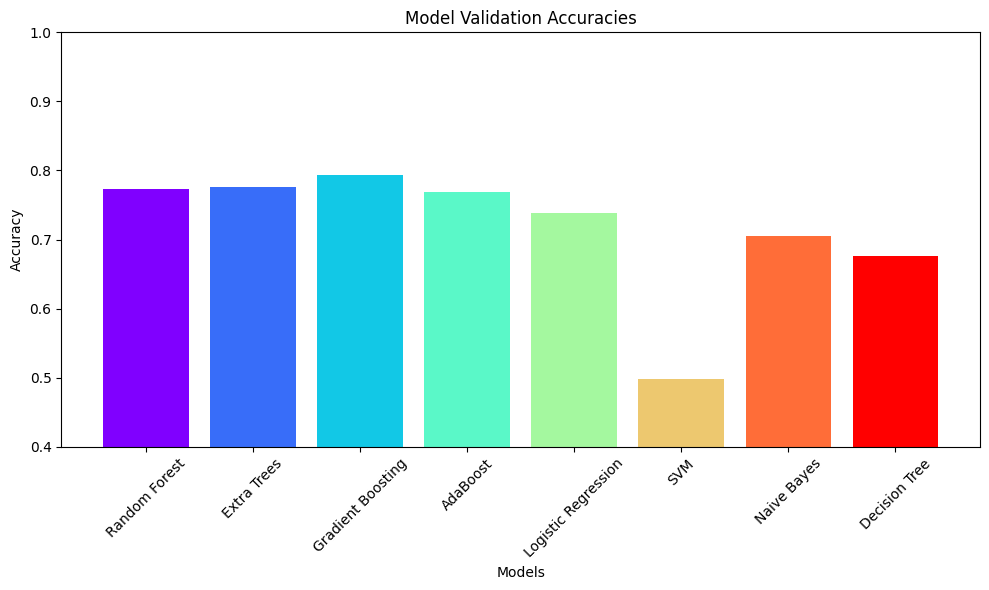

In [ ]:
# Create a bar plot to visualize model accuracies on the validation set
plt.figure(figsize=(10, 6))
colors = plt.cm.rainbow(np.linspace(0, 1, len(model_names)))
plt.bar(model_names, accuracies, color=colors)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Validation Accuracies')
plt.xticks(rotation=45)
plt.ylim(0.4, 1.0)
plt.tight_layout()
plt.show()

<ipython-input-21-48fe2eb0500c>:10: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


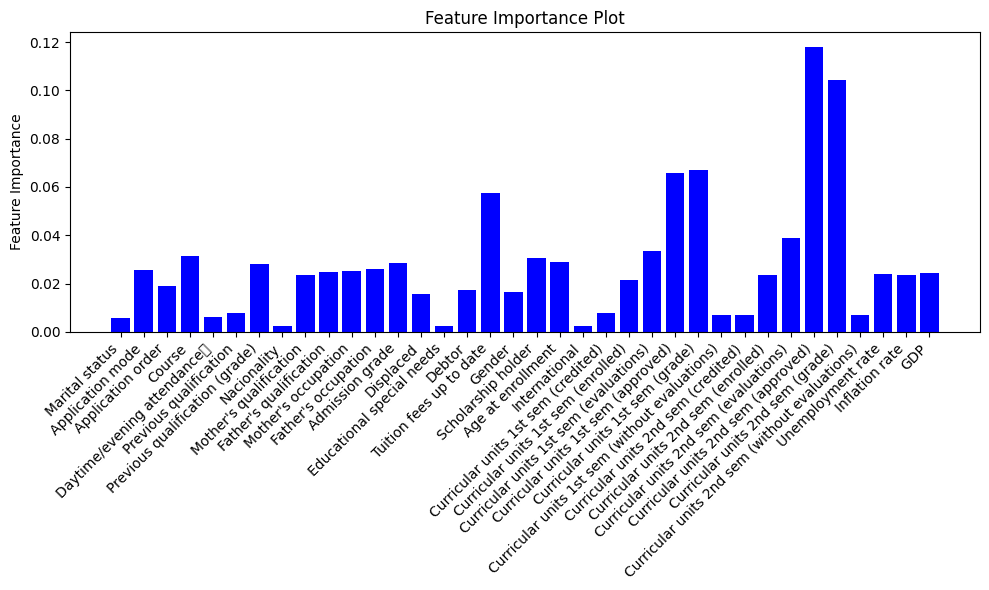

In [ ]:
# Retrieve feature importances from the trained AdaBoost ensemble
feature_importances = adaboost_classifier.feature_importances_

# Create a feature importance plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances, color='blue')
plt.xticks(range(len(feature_importances)), X_labeled.columns, rotation=45, ha='right')
plt.ylabel('Feature Importance')
plt.title('Feature Importance Plot')
plt.tight_layout()
plt.show()


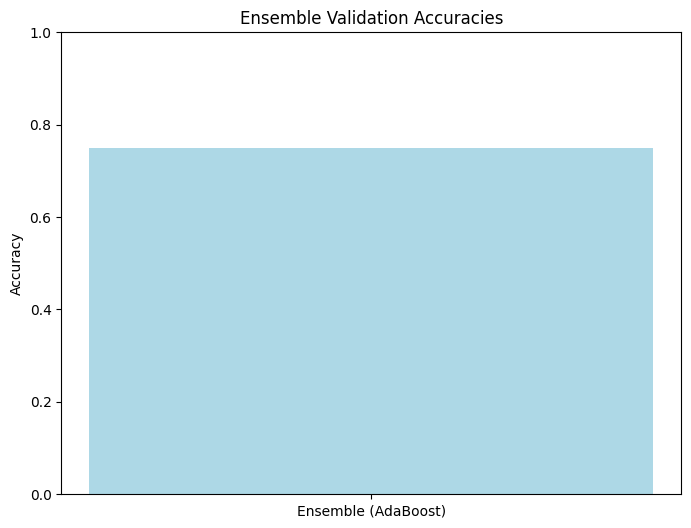

In [ ]:
labels = ['Ensemble (AdaBoost)']
accuracies = [ensemble_accuracy]
plt.figure(figsize=(8, 6))
plt.bar(labels, accuracies, color='lightblue')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Ensemble Validation Accuracies')
plt.show()

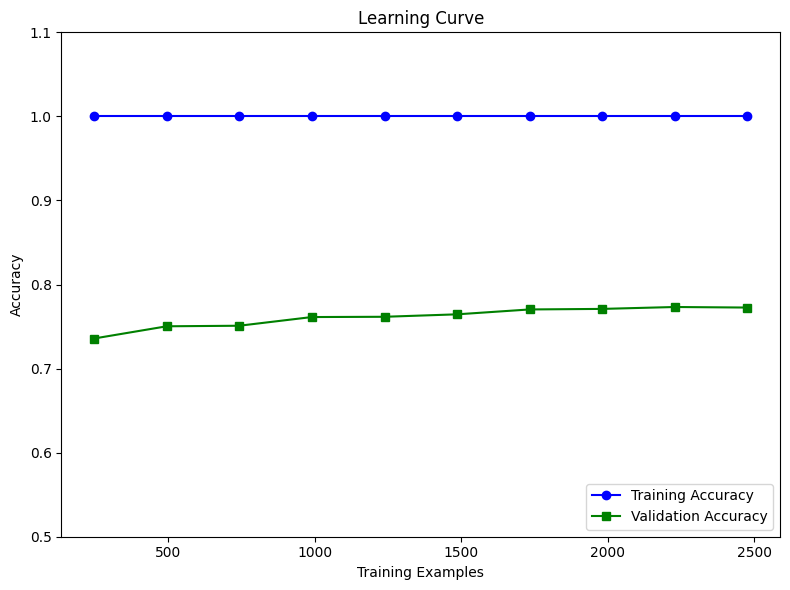

In [ ]:
import warnings
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Suppress warnings
warnings.filterwarnings("ignore")

# Calculate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    adaboost_classifier, X_labeled, y_labeled.values.ravel(), cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Create learning curve plot
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), color='blue', marker='o', label='Training Accuracy')
plt.plot(train_sizes, np.mean(test_scores, axis=1), color='green', marker='s', label='Validation Accuracy')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend(loc='lower right')
plt.ylim(0.5, 1.1)
plt.tight_layout()
plt.show()

# Restore warnings
warnings.resetwarnings()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


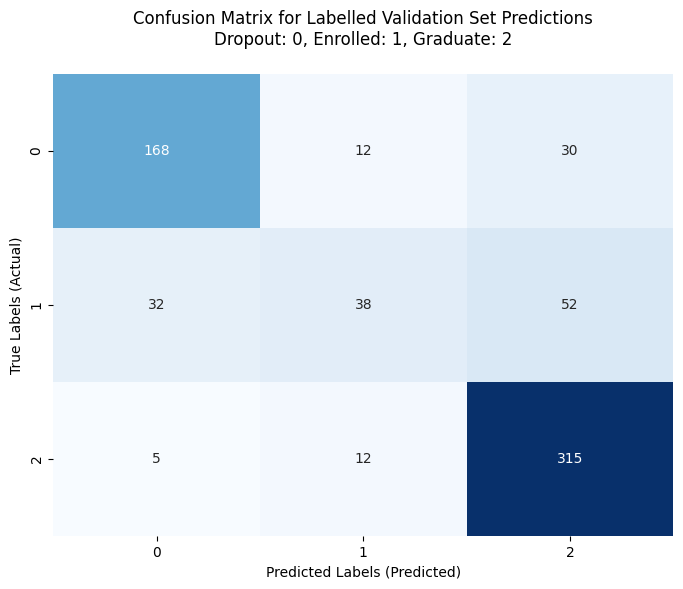

In [ ]:
# Create a confusion matrix for the test set predictions
cm = confusion_matrix(y_unlabeled_test, test_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels (Predicted)')
plt.ylabel('True Labels (Actual)')
plt.title('''Confusion Matrix for Labelled Validation Set Predictions
Dropout: 0, Enrolled: 1, Graduate: 2
              ''')
plt.show()